 **Curso Ciencia de Datos**

 Ing. Marcelo Saavedra

Ejemplo 1
Resolver el Problema de la Base de datos: Los Lirios de Fisher mediante una Red Neuronal Multilayer Perceptron

Cargando las librerias a usar

In [19]:
# Cargar Librerias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Cargando la Base de Datos

In [20]:
# Cargar la base de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Graficando los Datos

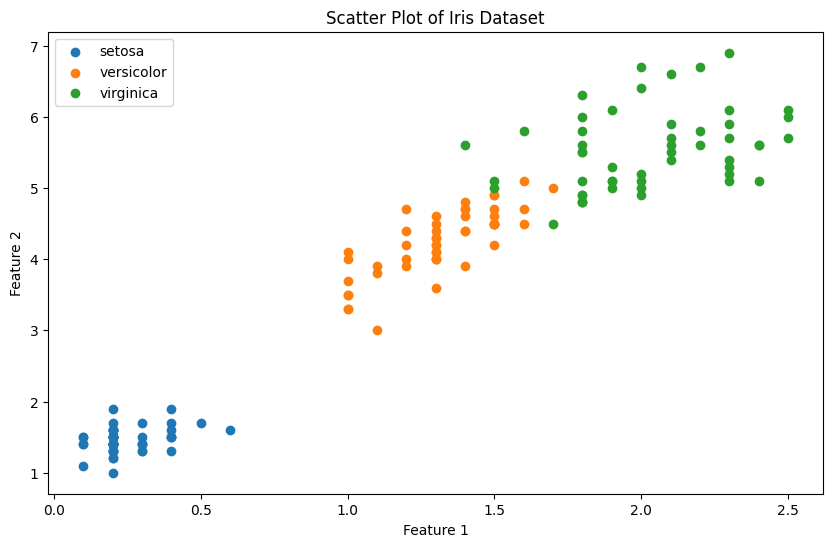

In [21]:
# Etiquetas de las clases
target_names = iris.target_names

# Graficar los datos
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 3], X[y == i, 2], label=target_name)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Iris Dataset')
plt.legend()
plt.show()

Diseñar el modelo de RN y ejecutar el programa

In [22]:
# Crear y entrenar el modelo
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), activation='relu', max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2
 2]
[1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1 0 1 1 2 2 2 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 2 0 2 2 2
 2]


Resultados

In [23]:
# Calcular la precisión y la pérdida en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, model.predict_proba(X_test))
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Accuracy on test data: {accuracy:.2f}')
print(f'Log Loss on test data: {loss:.2f}')
print(classification_rep)

Accuracy on test data: 0.96
Log Loss on test data: 0.17
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       1.00      0.89      0.94        27
   virginica       0.89      1.00      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Matriz de Confusion

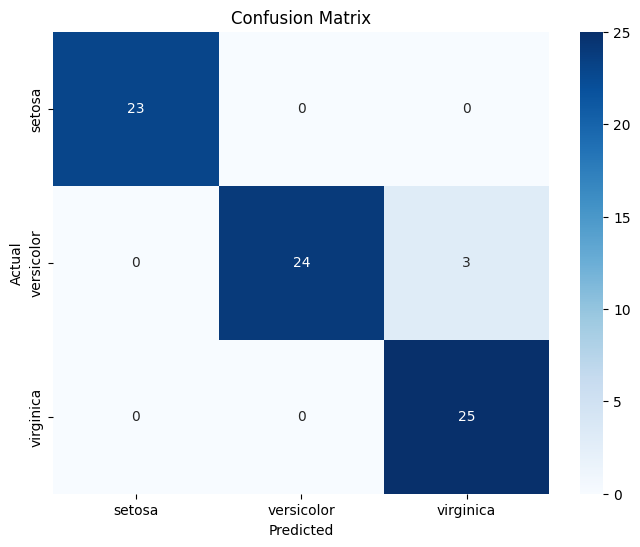

In [24]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
